In [12]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tabulate import tabulate

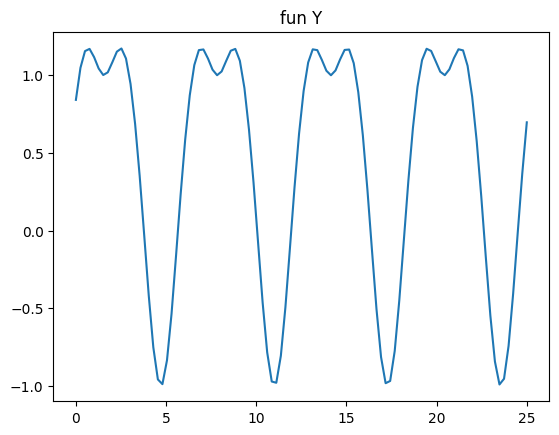

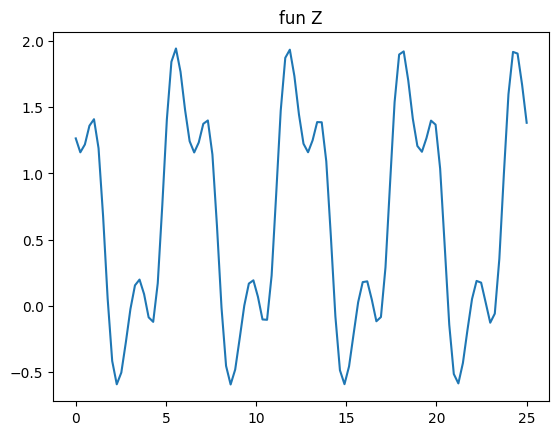

In [13]:
def get_y(x):
    return np.sin(x) + np.cos(x)*np.sin(np.cos(x))
def get_z(x, y):
    return np.sin(5*np.cos(x)/2) + np.cos(y)

x_values = np.linspace(0, 25, 100)
y_values = get_y(x_values)
z_values = get_z(x_values, y_values)

plt.plot(x_values, y_values)
plt.title("fun Y")
plt.show()

plt.plot(x_values, z_values)
plt.title("fun Z")
plt.show()



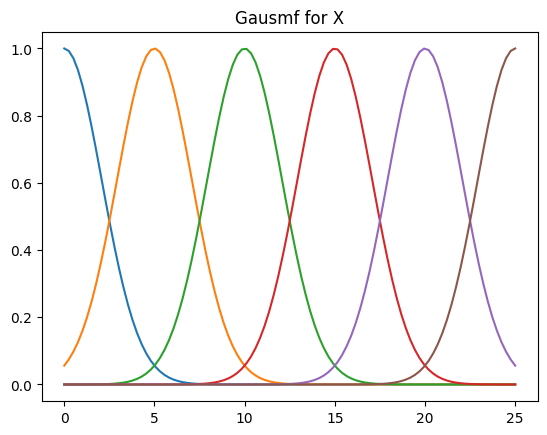

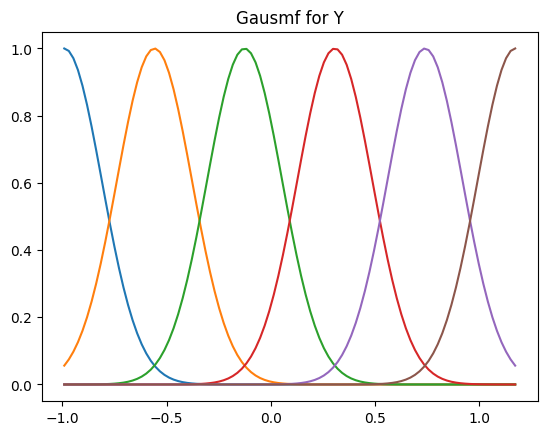

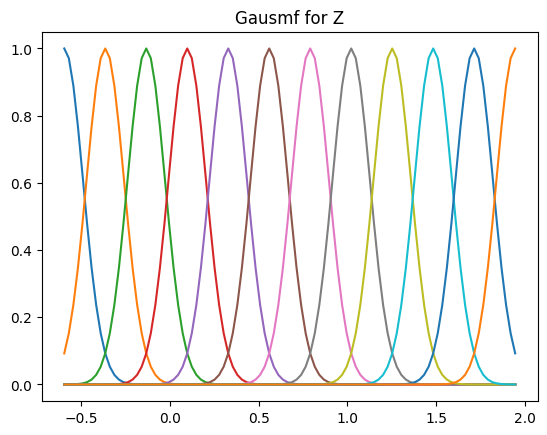

In [14]:
mf_num_input = 6
mf_num_output = 12

x_means = np.linspace(min(x_values), max(x_values), mf_num_input)
y_means = np.linspace(min(y_values), max(y_values), mf_num_input)
z_means = np.linspace(min(z_values), max(z_values), mf_num_output)

# Sigmas
x_sigma = (max(x_values) - min(x_values)) / mf_num_input / 2
y_sigma = (max(y_values) - min(y_values)) / mf_num_input / 2
z_sigma = (max(z_values) - min(z_values)) / mf_num_output / 2
# Gaussian fuzzy membership functions
x_mf_gaussian = [fuzz.gaussmf(x_values, x_means[i], x_sigma) for i in range(mf_num_input)]
y_mf_gaussian = [fuzz.gaussmf(np.linspace(min(y_values), max(y_values), 100), y_means[i], y_sigma) for i in range(mf_num_input)]
z_mf_gaussian = [fuzz.gaussmf(np.linspace(min(z_values), max(z_values), 100), z_means[i], z_sigma) for i in range(mf_num_output)]
# Plot trifm for X
for i in range(mf_num_input):
    plt.plot(x_values, x_mf_gaussian[i])
plt.title("Gausmf for X")
plt.show()
# Plot trifm for Y
for i in range(mf_num_input):
    plt.plot(np.linspace(min(y_values), max(y_values), 100), y_mf_gaussian[i])
plt.title("Gausmf for Y")
plt.show()
# Plot trifm for Z
for i in range(mf_num_output):
    plt.plot(np.linspace(min(z_values), max(z_values), 100), z_mf_gaussian[i])
plt.title("Gausmf for Z")
plt.show()


In [15]:
# Calculate value for triangular mf
# Get number of best function for value
def get_fun_num(value, means, sigma):
    best_func_value = -float("inf")
    best_index = -1
    for index, mean in enumerate(means):
        if fuzz.gaussmf(value, mean, sigma) > best_func_value:
            best_func_value = fuzz.gaussmf(value, mean, sigma)
            best_index = index
    return best_index

print("Values' table:")
table = [["y\\x"] + [str(x) for x in x_means]]
for y_value in y_means:
    row = [round(y_value, 2)]
    for x in x_means:
        z = get_z(x, y_value)
        row.append(round(z, 2))
    table.append(row)
print(tabulate(table, tablefmt="grid"))

# Table of function's name
rules = {}
print("Function's name's table:")
table = [["y\\x"] + ["mx" + str(i) for i in range(1, mf_num_input + 1)]]
for i in range(mf_num_input):
    row = ["my" + str(i + 1)]
    for j in range(mf_num_input):
        z = get_z(x_means[j], y_means[i])
        best_func = get_fun_num(z, z_means, z_sigma)
        row.append("mf" + str(best_func + 1))
        rules[(j, i)] = best_func
    table.append(row)
print(tabulate(table, tablefmt="grid"))
# Print rules
print("\nRules:")
for rule in rules:
    print(f"if (x is mx{rule[0] + 1}) and (y is my{rule[1] + 1}) then (z is mf{rules[rule]+ 1})")

Values' table:
+-------+------+------+-------+-------+-------+-------+
| y\x   | 0    | 5    | 10    | 15    | 20    | 25    |
+-------+------+------+-------+-------+-------+-------+
| -0.99 | 1.15 | 1.2  | -0.32 | -0.4  |  1.4  |  1.16 |
+-------+------+------+-------+-------+-------+-------+
| -0.56 | 1.45 | 1.5  | -0.02 | -0.1  |  1.7  |  1.46 |
+-------+------+------+-------+-------+-------+-------+
| -0.13 | 1.59 | 1.64 |  0.13 |  0.05 |  1.84 |  1.61 |
+-------+------+------+-------+-------+-------+-------+
| 0.31  | 1.55 | 1.6  |  0.09 |  0.01 |  1.81 |  1.57 |
+-------+------+------+-------+-------+-------+-------+
| 0.74  | 1.34 | 1.39 | -0.13 | -0.21 |  1.59 |  1.35 |
+-------+------+------+-------+-------+-------+-------+
| 1.17  | 0.99 | 1.04 | -0.48 | -0.56 |  1.24 |  1    |
+-------+------+------+-------+-------+-------+-------+
Function's name's table:
+-----+------+------+-----+-----+------+------+
| y\x | mx1  | mx2  | mx3 | mx4 | mx5  | mx6  |
+-----+------+------+---

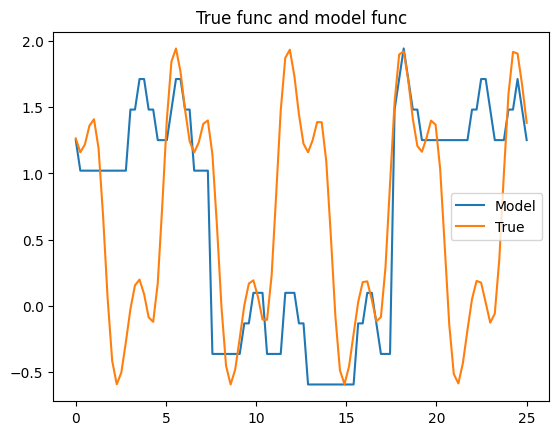


Mean Squared Error (MSE): 0.9819454287370781
Mean Absolute Error (MAE): 0.7304312899106497


In [16]:
# Model
z_output = []
for x in x_values:
    best_x_func = get_fun_num(x, x_means, x_sigma)
    best_y_func = get_fun_num(get_y(x), y_means,y_sigma)
    best_z_func = rules[(best_x_func, best_y_func)]
    z_output.append(z_means[best_z_func])
# Plot results
plt.plot(x_values, z_output, label="Model")
plt.plot(x_values, z_values, label="True")
plt.title("True func and model func")
plt.legend()
plt.show()

# Get scores
mse = mean_squared_error(z_values, z_output)
mae = mean_absolute_error(z_values, z_output)
print(f"\nMean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")